In [2]:
# 학습 데이터 생성

import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [3]:
# W, b 초기화
# Learning Rate 설정

W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

In [4]:
# 반복횟수 설정

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  # Hypothesis, cost 설정

  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1 - y_train) * torch.log(1 - hypothesis)
  )

  #경사 계산, W,b 업데이트

  cost.backward()

  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

  #학습이 잘 되는지 확인 출력


  if epoch % 100 == 0:
    print('epoch : {}, cost : {:.6f}, W : {:.6f}, b : {:.6f}'.format(
        epoch, cost.item(), W.squeeze(), b.squeeze()
   ))
    


epoch : 0, cost : 0.693147, W : -0.154167, b : 0.083333
epoch : 100, cost : 0.420221, W : -1.451281, b : 4.406925
epoch : 200, cost : 0.398721, W : -1.898433, b : 5.773750
epoch : 300, cost : 0.390820, W : -2.174322, b : 6.609553
epoch : 400, cost : 0.387009, W : -2.367329, b : 7.191599
epoch : 500, cost : 0.384924, W : -2.510626, b : 7.622530
epoch : 600, cost : 0.383699, W : -2.620779, b : 7.953164
epoch : 700, cost : 0.382944, W : -2.707397, b : 8.212804
epoch : 800, cost : 0.382463, W : -2.776597, b : 8.420023
epoch : 900, cost : 0.382149, W : -2.832521, b : 8.587363
epoch : 1000, cost : 0.381941, W : -2.878112, b : 8.723699
epoch : 1100, cost : 0.381801, W : -2.915530, b : 8.835541
epoch : 1200, cost : 0.381706, W : -2.946401, b : 8.927779
epoch : 1300, cost : 0.381641, W : -2.971979, b : 9.004180
epoch : 1400, cost : 0.381596, W : -2.993242, b : 9.067673
epoch : 1500, cost : 0.381565, W : -3.010968, b : 9.120598
epoch : 1600, cost : 0.381543, W : -3.025776, b : 9.164800
epoch : 1

In [5]:
  x_test = torch.FloatTensor([[4.5],[1.1]])
  test_result = torch.sigmoid(torch.mm(x_test, W) + b)
  print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [12]:
# 여러가지 optimizer 사용해보기
# SGD 사용



for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)


  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
      -y_train * torch.log(hypothesis)
      -(1 - y_train) * torch.log(1 - hypothesis)
  )

  optimizer = torch.optim.SGD([W,b], lr = 1.0)

  optimizer.zero_grad()
  optimizer.step()
  cost.backward()

  if epoch % 100 == 0:
    print('epoch : {}, cost : {:.6f}, W : {:.6f}, b : {:.6f}'.format(
        epoch, cost.item(), W.squeeze(), b.squeeze()
     ))


epoch : 0, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 100, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 200, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 300, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 400, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 500, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 600, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 700, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 800, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 900, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1000, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1100, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1200, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1300, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1400, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1500, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1600, cost : 0.381491, W : -3.096662, b : 9.376306
epoch : 1

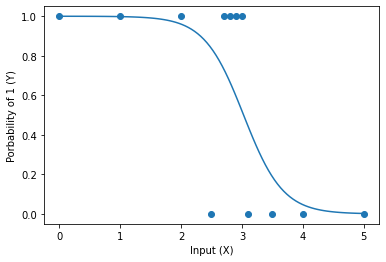

In [7]:
#Matplotlib으로 결과 시각화

import matplotlib.pyplot as plt

W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W) + b)
plt.ylabel("Porbability of 1 (Y)")
plt.xlabel("Input (X)")
plt.plot(X,Y)
plt.show()

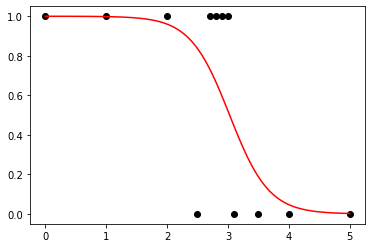

In [8]:
plt.scatter(x_train, y_train, c="black")
plt.plot(X,Y, c="#ff0000")
plt.show()

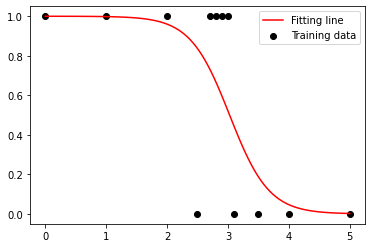

In [9]:
plt.scatter(x_train, y_train, c = "black", label = "Training data")
plt.plot(X, Y, c="#ff0000", label = "Fitting line")
plt.legend()

In [ ]:
# 사이킷런에서 Logistic Regression 사용

from sklearn.linear_model import LogisticRegression

x_train = [[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]]
y_train = [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]

model = LogisticRegression(penalty = 'none')
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)

print(test_result)


[[-3.10385806]] [9.39776831]
[0 1]
